# Tools for Profiling HPC Applications

In high-performance computing (HPC), optimizing applications requires a deep understanding of how code interacts with the underlying hardware. Profiling tools provide insights into CPU usage, memory consumption, and performance characteristics. In this section, we explore some widely used tools for CPU and memory profiling, including `gprof`, `perf`, and Intel's VTune.

### Gprof and Perf

**Gprof** is a GNU profiling tool that collects and arranges statistics on program execution. It is useful for identifying functions consuming the most time, making it ideal for CPU-bound applications. However, Gprof might miss short-lived functions or provide limited insights into multi-threaded programs.

**Perf**, built into the Linux kernel, offers a more comprehensive analysis by providing detailed information about CPU usage, cache hits and misses, and more. Perf supports system-wide and application-specific profiling, making it valuable for identifying bottlenecks in complex HPC environments.

Example of using `perf` for profiling:
```bash
perf record -F 99 -a -g -- ./my_hpc_application
perf report


# Tools for Profiling HPC Applications

In high-performance computing (HPC), it is crucial to understand where computational resources are spent in order to optimize performance. Profiling tools, such as `gprof`, help identify functions that consume the most execution time.

In this exercise, we will:
1. Write three functions that perform different matrix operations (multiplication, addition, and transpose).
2. Use `gprof` to profile the execution and compare the time spent in each function.
3. Learn how to analyze profiling reports and identify which function is the most computationally expensive.

By understanding profiling reports, we can focus our optimization efforts on the most time-consuming parts of the code.


In [1]:
import os
import subprocess

def is_colab():
    # Check if running in Google Colab
    return os.path.exists('/content')

def is_hpc_cluster():
    # Check if running on an HPC cluster
    return os.path.exists('/cvmfs/soft.computecanada.ca')

def compile_and_run_gprof_code():
    # Write the C code for profiling with gprof
    code = """
    #include <stdio.h>
    #include <stdlib.h>

    #define N 500  // Define matrix size

    // Matrix Multiplication
    void matrix_multiply(int A[N][N], int B[N][N], int C[N][N]) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                C[i][j] = 0;
                for (int k = 0; k < N; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }

    // Matrix Addition
    void matrix_add(int A[N][N], int B[N][N], int C[N][N]) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                C[i][j] = A[i][j] + B[i][j];
            }
        }
    }

    // Matrix Transpose
    void matrix_transpose(int A[N][N], int T[N][N]) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                T[j][i] = A[i][j];
            }
        }
    }

    int main() {
        int A[N][N], B[N][N], C[N][N], T[N][N];

        // Initialize matrices A and B with random values
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                A[i][j] = rand() % 100;
                B[i][j] = rand() % 100;
            }
        }

        // Perform matrix operations
        matrix_multiply(A, B, C);      // Matrix Multiplication
        matrix_add(A, B, C);           // Matrix Addition
        matrix_transpose(A, T);        // Matrix Transpose

        return 0;
    }
    """

    # Save the C code to a file
    with open("matrix_operations.c", "w") as file:
        file.write(code)

    # Compile the C program with profiling enabled (-pg flag)
    if is_colab():
        # In Colab
        !gcc -pg -o matrix_operations matrix_operations.c
        !./matrix_operations
        !gprof matrix_operations gmon.out > profile_report.txt
        !cat profile_report.txt
    elif is_hpc_cluster():
        # In HPC Cluster
        subprocess.run(["gcc", "-pg", "-o", "matrix_operations", "matrix_operations.c"])
        subprocess.run(["./matrix_operations"])
        subprocess.run(["gprof", "./matrix_operations", "gmon.out"], stdout=open('profile_report.txt', 'w'))
        with open('profile_report.txt', 'r') as f:
            print(f.read())

# Run the function to compile and profile the code
compile_and_run_gprof_code()


Flat profile:

Each sample counts as 0.01 seconds.
  %   cumulative   self              self     total           
 time   seconds   seconds    calls   s/call   s/call  name    
 99.35      1.52     1.52        1     1.52     1.52  matrix_multiply
  0.65      1.53     0.01        1     0.01     0.01  matrix_transpose
  0.00      1.53     0.00        1     0.00     0.00  matrix_add

 %         the percentage of the total running time of the
time       program used by this function.

cumulative a running sum of the number of seconds accounted
 seconds   for by this function and those listed above it.

 self      the number of seconds accounted for by this
seconds    function alone.  This is the major sort for this
           listing.

calls      the number of times this function was invoked, if
           this function is profiled, else blank.

 self      the average number of milliseconds spent in this
ms/call    function per call, if this function is profiled,
	   else blank.

 total   

# Explanation of Profiling Code

### What the Code Does

The C program performs a matrix multiplication of two 500x500 matrices. It is compiled with the `-pg` flag, enabling `gprof` to collect profiling information. This information is saved in a file called `gmon.out`, and `gprof` generates a detailed profiling report that shows how much time was spent in each function.

The profiling process is as follows:
1. **Matrix Multiplication**: The program generates random 500x500 matrices, multiplies them, and outputs nothing (focusing only on profiling performance).
2. **Profiling with `gprof`**: The program is compiled with the `-pg` flag to enable profiling. After running the program, `gprof` is used to generate a profiling report.

### Understanding the Report

The report will show statistics on function calls, including:
- **Self Time**: The time spent in the function itself.
- **Total Time**: The total time spent in the function, including calls to other functions.
- **Call Graph**: A breakdown of which functions were called, and how much time was spent in each.

### Learning Points
- **Profiling in HPC**: Profiling helps identify bottlenecks in HPC applications, especially in compute-heavy functions like matrix multiplication.
- **Environment-Specific Execution**: This notebook is designed to run in both Google Colab and an HPC cluster, adjusting the commands for each environment.
- **Next Steps**: Use this information to optimize the matrix multiplication algorithm by implementing techniques like loop unrolling, blocking, or vectorization to improve performance.


# Valgrind Memory Profiling Example

In this section, we will demonstrate how to use **Valgrind**, a powerful dynamic analysis tool, to detect memory-related issues in a C program. Valgrind can identify problems such as memory leaks, invalid memory access, buffer overflows, and other memory mismanagement issues.

The following example intentionally introduces two common memory issues:
- **Memory Leak**: We allocate memory for an array but forget to free it, which leads to a memory leak.
- **Invalid Write**: The program accesses an out-of-bounds memory location (writing past the allocated memory), which Valgrind will catch as an invalid write.

The Valgrind tool will analyze the program and generate detailed information on these issues, helping us understand what went wrong and where.

We will:
1. Compile a simple C program with memory errors.
2. Run the compiled program through Valgrind's Memcheck tool.
3. Analyze the Valgrind output to identify the errors.

Let's begin by running the following code.


In [3]:
# If using a cluster with modules (e.g. Magi Castle)
!bash -c "module load valgrind-mpi/3.16.1 && module list"

bash: line 1: module: command not found


In [4]:
# IF no modules try to install it (e/g/ COLAB)
# Install Valgrind (required for Colab and similar environments)
!apt-get install -y valgrind


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gdb libbabeltrace1 libc6-dbg libdebuginfod-common libdebuginfod1 libipt2
  libsource-highlight-common libsource-highlight4v5
Suggested packages:
  gdb-doc gdbserver valgrind-dbg valgrind-mpi kcachegrind alleyoop valkyrie
The following NEW packages will be installed:
  gdb libbabeltrace1 libc6-dbg libdebuginfod-common libdebuginfod1 libipt2
  libsource-highlight-common libsource-highlight4v5 valgrind
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 32.3 MB of archives.
After this operation, 111 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libdebuginfod-common all 0.186-1build1 [7,878 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libbabeltrace1 amd64 1.5.8-2build1 [160 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libdebuginfod1 amd6

In [ ]:
import subprocess
import os

def run_valgrind_example():
    # C code with memory and logic errors
    code = """
    #include <stdio.h>
    #include <stdlib.h>

    int main() {
        int *array = (int*)malloc(5 * sizeof(int));  // Allocate space for 5 integers

        // Error: Accessing out-of-bounds memory (invalid write)
        for (int i = 0; i <= 5; ++i) {  // The loop should run until i < 5
            array[i] = i * 10;
        }

        // Printing the array
        printf("Array contents:\\n");
        for (int i = 0; i < 5; ++i) {
            printf("%d ", array[i]);
        }
        printf("\\n");

        // Error: Forgetting to free the memory (memory leak)
        // free(array);  <-- This line is commented, leading to a memory leak

        return 0;
    }
    """

    # Save the C code to a file
    with open("valgrind_example.c", "w") as file:
        file.write(code)

    # Compile the C program
    compile_result = subprocess.run(["gcc", "-o", "valgrind_example", "valgrind_example.c"], capture_output=True, text=True)

    if compile_result.returncode != 0:
        print(f"Compilation failed:\n{compile_result.stderr}")
        return
    else:
        print("Compilation successful.")

    # Run the program with Valgrind's Memcheck tool to detect memory errors
    valgrind_command = [
        "valgrind",
        "--leak-check=full",           # Detailed memory leak detection
        "--track-origins=yes",         # Track where uninitialized values come from
        "--show-reachable=yes",        # Show all reachable memory at the end
        "--log-file=valgrind_log.txt", # Save Valgrind output to a file
        "./valgrind_example"
    ]

    valgrind_result = subprocess.run(valgrind_command, capture_output=True, text=True)

    if valgrind_result.returncode != 0:
        print(f"Valgrind execution failed:\n{valgrind_result.stderr}")
    else:
        print("Valgrind execution output:\n")
        with open("valgrind_log.txt", "r") as log_file:
            print(log_file.read())

# Run the function to compile and execute the C program under Valgrind
run_valgrind_example()


Compilation successful.
Valgrind execution output:

==18106== Memcheck, a memory error detector
==18106== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==18106== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==18106== Command: ./valgrind_example
==18106== Parent PID: 237
==18106== 
==18106== Invalid write of size 4
==18106==    at 0x1091ED: main (in /content/valgrind_example)
==18106==  Address 0x4a9d054 is 0 bytes after a block of size 20 alloc'd
==18106==    at 0x4848899: malloc (in /usr/libexec/valgrind/vgpreload_memcheck-amd64-linux.so)
==18106==    by 0x1091BE: main (in /content/valgrind_example)
==18106== 
==18106== 
==18106== HEAP SUMMARY:
==18106==     in use at exit: 20 bytes in 1 blocks
==18106==   total heap usage: 2 allocs, 1 frees, 4,116 bytes allocated
==18106== 
==18106== 20 bytes in 1 blocks are definitely lost in loss record 1 of 1
==18106==    at 0x4848899: malloc (in /usr/libexec/valgrind/vgpreload_memcheck-amd64-linux.so)
==181

### Valgrind Output Explanation

The Valgrind Memcheck tool analyzed the program and detected two critical issues:

1. **Invalid Write**:
    - Valgrind reports an **invalid write** of size 4 (attempting to write an integer).
    - This happens because the loop accesses memory beyond the allocated array. The array has 5 elements (index 0 to 4), but the loop tries to access index 5 (`i <= 5` should be `i < 5`).
    - Valgrind provides the exact line where the error occurred and the size of the block of memory allocated (`20 bytes for 5 integers`).

2. **Memory Leak**:
    - Valgrind detects that 20 bytes of memory were **definitely lost**. This means that memory was allocated but never freed, leading to a memory leak.
    - Valgrind's **Leak Summary** shows that the program allocated memory but did not free it (since `free(array);` was commented out).

This example demonstrates the power of Valgrind in detecting common memory errors that can lead to crashes or inefficient memory usage in programs. Valgrind is particularly useful in ensuring memory safety and identifying bugs that can otherwise be difficult to catch through regular debugging.


# Executing Serial and Parallel Profiling on an HPC Cluster with TAU

Profiling is a critical technique used in High-Performance Computing (HPC) to identify bottlenecks and optimize code performance. This guide will walk you through the steps to execute serial and parallel profiling on an HPC cluster using **TAU** (Tuning and Analysis Utilities).

We will use **matrix multiplication** as an example for both serial and parallel profiling.

---

## Serial Profiling: Step-by-Step

### 1. Loading the Required Modules

Before running TAU, you need to load the necessary modules. TAU is typically available on HPC systems as a module. To check if TAU is available and load it, run the following commands:

```bash
module avail tau   # Check if TAU is available on your cluster
module load tau/2.30.1  # Load the required version of TAU



---

### **Step 2: Serial Matrix Multiplication Program (C)**

The following C code performs matrix multiplication for two 500x500 matrices.

```c
#include <stdio.h>

#define N 500  // Size of the matrix

void matrix_multiply(double A[N][N], double B[N][N], double C[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            C[i][j] = 0;
            for (int k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[N][N], B[N][N], C[N][N];
    
    // Initialize matrices A and B
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            A[i][j] = i + j;
            B[i][j] = i - j;
        }
    }

    // Perform matrix multiplication
    matrix_multiply(A, B, C);

    return 0;
}



### **Step 3: Compiling the Serial Program**

Use TAU's compiler to instrument the code for profiling:

```bash
tau_cc -o matrix_serial matrix_multiply.c
```

This will compile the serial matrix multiplication program and prepare it for profiling.

---

### **Step 4: Running the Serial Program**

Now, run the compiled program:

```bash
./matrix_serial
```

This will generate a profiling log of the program’s execution.

---

### **Step 5: Viewing the Profiling Results**

Once the program finishes running, use TAU’s `pprof` tool to view the profiling results:


You will see a table showing the breakdown of where the program spent its time. The output might look like this:

```bash
% cumulative self self total time seconds seconds calls ms/call ms/call name 75.0 0.30 0.30 1 300.00 400.00 matrix_multiply 25.0 0.40 0.10 1 100.00 100.00 initialize_matrix
```

---

### **Step 6: Analysis**

The output shows that the `matrix_multiply` function takes the majority of the program’s execution time. This function can be optimized by techniques such as:

- **Loop Unrolling**: Reduces loop overhead and increases instruction-level parallelism.
- **Cache Blocking**: Improves cache usage by breaking down the matrix into smaller blocks.



## Parallel Matrix Multiplication Code
### **Step 1: Writing the Parallel Matrix Multiplication Code**

The following code demonstrates a parallel matrix multiplication implementation using MPI. This code will be used to perform profiling on a parallel workload:

```c
#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>

#define N 4  // Matrix size (N x N)

void matrix_multiply(double A[N][N], double B[N][N], double C[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            C[i][j] = 0;
            for (int k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);  // Initialize MPI

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    double A[N][N], B[N][N], C[N][N];

    // Initialize matrices A and B
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            A[i][j] = rank + i + j;
            B[i][j] = rank + i - j;
        }
    }

    // Perform matrix multiplication
    matrix_multiply(A, B, C);

    // Print the result matrix from process 0
    if (rank == 0) {
        printf("Matrix C (result):\n");
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                printf("%f ", C[i][j]);
            }
            printf("\n");
        }
    }

    MPI_Finalize();  // Finalize MPI
    return 0;
}


### **Step 2: Compiling the Parallel Program**

To instrument the code for profiling with TAU and compile it, use the following command:

```bash
tau_cc -T mpi -o matrix_parallel mpi_matrix_multiply.c
```

This will compile the program and instrument it for parallel profiling.

Step 3: Running the Parallel Program with TAU
Run the instrumented parallel program using mpirun and tau_exec to trace the parallel execution:

```bash
tau_exec mpirun --oversubscribe -np 4 ./matrix_parallel
```

The --oversubscribe flag allows more processes than the available CPU cores in testing environments. After executing the program, TAU will record profiling data for each MPI process.

Step 4: Viewing the Profiling Data
Once the program finishes, you can view the profiling data using TAU’s paraprof tool, which provides a GUI interface to visualize the results:

```bash
paraprof
```

In case you encounter issues with Java, ensure that the correct version of Java is loaded using the appropriate module (e.g., module load java/17.0.2).

Step 5: Analyzing the Profiling Output
TAU will generate a detailed report that includes information about MPI calls and the time spent in each function. An example of the analysis output might look like this:

```bash
Process 0: Time spent in MPI_Wait: 50%
Process 1: Time spent in MPI_Wait: 5%
Process 2: Time spent in MPI_Wait: 5%
```

This suggests that process 0 is spending a significant amount of time waiting, likely due to load imbalance. Improving load balancing by redistributing matrix blocks or optimizing communication can enhance performance.

Step 6: Optimization Suggestions
The profiling results indicate that the workload is not evenly distributed across the processes. To address this:

Redistribute Matrix Blocks: Split matrix blocks evenly across processes to ensure that no single process does more work than others.
Optimize Communication: Reduce the time spent waiting for data from other processes by optimizing communication between processes using non-blocking MPI calls.

# Performance Profiling in HPC with Gperftools

## Introduction

In this practice, we will explore how to profile applications in a high-performance computing (HPC) environment using **gperftools**. Gperftools is a popular set of performance analysis tools originally developed by Google and widely used in HPC to measure CPU and memory usage in large-scale applications. Profiling is a crucial step in optimizing HPC applications, as it helps developers identify bottlenecks and inefficient code paths, which is especially important in parallel and distributed computing environments.

We will focus on two main tools in this suite:
1. **pprof**: A CPU statistical profiler that provides insights into the time spent in different parts of a program.
2. **tc_malloc**: A thread-caching memory allocator that enhances memory allocation performance and supports dynamic memory profiling.

By the end of this practice, you will:
- Learn how to use gperftools to profile a basic C++ application.
- Understand how to interpret profiling data for performance tuning.
- Explore profiling in both single-node and multi-node (MPI-based) setups.

**Why profiling?**
Profiling helps us to:
- Identify performance bottlenecks.
- Optimize the code for better CPU usage.
- Monitor memory leaks and dynamic memory allocation issues.
- Enhance scalability by understanding the performance of MPI-based parallel applications.

---

## Steps for Profiling with Gperftools

We will use a simple matrix multiplication program as our example to understand how profiling works. This example will be written in C++, and we will:
1. Compile the program with gperftools profiling enabled.
2. Run the program to generate a profile report.
3. Analyze the profiling report using `pprof`.

**Note:** The profiling tools need to be installed in the environment where the code is run, which we will do step by step in this notebook.

---

## Installation of Gperftools in Google Colab

We will first install `gperftools` in Google Colab as it is not natively available.


In [ ]:
# Install necessary packages
!apt-get update -qq
!apt-get install -y -qq libgoogle-perftools-dev graphviz ghostscript

In [6]:
# Create a C++ source file with both inefficient and optimized functions
cpp_code = """
#include <iostream>
#include <vector>
#include <gperftools/profiler.h>
#include <chrono>

using namespace std;

// Inefficient matrix multiplication
void matrixMultiplyInefficient(int N) {
    vector<vector<int>> A(N, vector<int>(N, 1));
    vector<vector<int>> B(N, vector<int>(N, 1));
    vector<vector<int>> C(N, vector<int>(N, 0));

    // Inefficient nested loops (bad cache usage)
    for (int j = 0; j < N; ++j) {
        for (int i = 0; i < N; ++i) {
            for (int k = 0; k < N; ++k) {
                C[j][i] += A[k][j] * B[i][k];
            }
        }
    }
}

// Optimized matrix multiplication
void matrixMultiplyOptimized(int N) {
    vector<vector<int>> A(N, vector<int>(N, 1));
    vector<vector<int>> B(N, vector<int>(N, 1));
    vector<vector<int>> C(N, vector<int>(N, 0));

    // Optimized nested loops (better cache usage)
    for (int i = 0; i < N; ++i) {
        for (int k = 0; k < N; ++k) {
            int r = A[i][k];
            for (int j = 0; j < N; ++j) {
                C[i][j] += r * B[k][j];
            }
        }
    }
}

int main() {
    int N = 500;  // Adjusted matrix size for demonstration

    // Start profiling
    ProfilerStart("matrixmult.prof");

    // Measure execution time of the inefficient function
    auto start = chrono::high_resolution_clock::now();
    matrixMultiplyInefficient(N);
    auto end = chrono::high_resolution_clock::now();
    auto duration_inefficient = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Inefficient function time: " << duration_inefficient << " ms" << endl;

    // Measure execution time of the optimized function
    start = chrono::high_resolution_clock::now();
    matrixMultiplyOptimized(N);
    end = chrono::high_resolution_clock::now();
    auto duration_optimized = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Optimized function time: " << duration_optimized << " ms" << endl;

    // Stop profiling
    ProfilerStop();

    return 0;
}
"""

# Save the C++ code to a file
with open("matrixmult.cpp", "w") as file:
    file.write(cpp_code)


In [5]:

# Compile the code with debug symbols
!g++ -O2 -g matrixmult.cpp -o matrixmult -lprofiler

# Run the compiled program
!./matrixmult

# Generate an SVG profiling report
!pprof --svg ./matrixmult matrixmult.prof > profiling_report.svg

# Display the SVG report
from IPython.display import SVG, display
display(SVG(filename='profiling_report.svg'))

# Display line-by-line profiling report
print("Line-by-Line Profiling Report:")
!pprof --lines --text ./matrixmult matrixmult.prof


Inefficient function time: 176 ms
Optimized function time: 106 ms
PROFILE: interrupts/evictions/bytes = 28/10/848
Using local file ./matrixmult.
Using local file matrixmult.prof.


Line-by-Line Profiling Report:
Using local file ./matrixmult.
Using local file matrixmult.prof.
Total: 28 samples
      13  46.4%  46.4%       13  46.4% matrixMultiplyInefficient /content/matrixmult.cpp:19
       6  21.4%  67.9%        6  21.4% matrixMultiplyOptimized /content/matrixmult.cpp:36
       5  17.9%  85.7%        5  17.9% matrixMultiplyOptimized /content/matrixmult.cpp:35
       4  14.3% 100.0%        4  14.3% matrixMultiplyInefficient /content/matrixmult.cpp:18
       0   0.0% 100.0%       28 100.0% __libc_start_call_main ./csu/../sysdeps/nptl/libc_start_call_main.h:58
       0   0.0% 100.0%       28 100.0% __libc_start_main_impl ./csu/../csu/libc-start.c:392
       0   0.0% 100.0%       28 100.0% _start ??:0
       0   0.0% 100.0%       17  60.7% main /content/matrixmult.cpp:50
       0   0.0% 100.0%       11  39.3% main /content/matrixmult.cpp:57


## Explanation of Code Sections

### 1. Installation of Gperftools

We start by installing `gperftools` in Google Colab. The command `apt-get install google-perftools` installs the necessary libraries for using gperftools, including the CPU profiler `pprof` and memory allocator `tc_malloc`.

### 2. Writing and Compiling the Matrix Multiplication Program

In this example, we created a C++ program that performs matrix multiplication on two square matrices of size `N`. Matrix multiplication is a good candidate for profiling in HPC environments because of its computational intensity and potential memory bottlenecks.

The program is instrumented with gperftools using the `ProfilerStart` and `ProfilerStop` functions, which enable profiling around the matrix multiplication logic. We use the command `env CPUPROFILE=matrixmult.prof ./matrixmult` to run the program and generate a profile.

### 3. Analyzing the Profile

We then use the `pprof` tool to analyze the generated profiling data. The text-based report produced by `pprof --text` gives us insights into the function execution time. To better visualize the data, we generate a PDF using `pprof --pdf` which contains a graph showing the CPU usage breakdown across different functions.

The results allow us to see which parts of the matrix multiplication are consuming the most resources, and based on that, we can optimize the code by improving algorithmic efficiency or better utilizing memory.


# Profiling C++ Programs with gperftools: Theory and Methodology

## Introduction

Performance optimization is a critical aspect of software development, especially for computationally intensive applications. Profiling tools help developers understand where their programs spend most of their execution time, enabling targeted optimizations for improved efficiency.

In this notebook, we will explore how to profile a C++ program using **gperftools**, a powerful profiling library developed by Google. We will:

- **Discuss the importance of profiling and how it aids in optimization.**
- **Introduce the concepts behind gperftools and how it collects profiling data.**
- **Create a complex C++ program with multiple computational functions.**
- **Use gperftools to profile the program and generate visual representations of its performance.**

## Why Profiling Matters

Profiling allows developers to:

- **Identify Performance Bottlenecks:** Determine which parts of the code consume the most resources.
- **Understand Program Behavior:** Gain insights into function calls and execution flow.
- **Guide Optimization Efforts:** Focus on areas that will yield the most significant performance gains.
- **Validate Optimizations:** Confirm that code changes have the desired effect on performance.

Without profiling, optimization efforts may be misguided, potentially wasting time on parts of the code that have minimal impact on overall performance.

## Overview of gperftools

**gperftools** is a collection of tools for analyzing and improving the performance of C++ programs. It includes:

- **CPU Profiler:** Samples the program's execution to identify where it spends most of its time.
- **Heap Checker and Profiler:** Helps detect memory leaks and analyze memory usage.
- **Thread-Caching Malloc:** An efficient memory allocator that can improve performance.

In this notebook, we'll focus on the CPU Profiler to analyze our program's execution.

## The C++ Program

Our program consists of several computational functions, each demonstrating different aspects of performance:

1. **Recursive Fibonacci (`fib_recursive`):**

   - Calculates Fibonacci numbers using recursion.
   - **Inefficient** due to redundant calculations.
   - Exhibits exponential time complexity.

2. **Iterative Fibonacci (`fib_iterative`):**

   - Calculates Fibonacci numbers using iteration.
   - **Efficient** with linear time complexity.

3. **Prime Number Generation (`generate_primes`):**

   - Uses the **Sieve of Eratosthenes** algorithm.
   - Efficiently generates all prime numbers up to a given limit.

4. **Naive Matrix Multiplication (`matrixMultiplyNaive`):**

   - Performs matrix multiplication with a straightforward triple-nested loop.
   - **Inefficient** due to poor memory access patterns and cache usage.

5. **Optimized Matrix Multiplication (`matrixMultiplyOptimized`):**

   - Improves upon the naive version by optimizing loop ordering and memory access.
   - **Efficient** with better cache utilization.

## What We Will Do

- **Compile and Run the Program:**

  - We'll compile the C++ program with profiling enabled.
  - Execute the program to generate profiling data.

- **Profile the Program with gperftools:**

  - Use gperftools to collect CPU usage samples during execution.
  - Generate a profiling report that highlights where the program spends its time.

- **Visualize the Profiling Data:**

  - Create visual representations, such as call graphs and flame graphs.
  - Analyze these visuals to understand function relationships and performance hotspots.

- **Interpret the Results:**

  - Compare the performance of recursive and iterative Fibonacci implementations.
  - Examine the impact of optimizing matrix multiplication.
  - Discuss how the profiling data informs optimization decisions.

By the end of this exercise, you'll have a deeper understanding of how to use profiling tools to analyze and optimize C++ programs, and you'll be equipped to apply these techniques to your own projects.


In [ ]:
# Install necessary packages
!apt-get update -qq
!apt-get install -y -qq libgoogle-perftools-dev graphviz ghostscript


Recursive Fibonacci of 35 is 9227465 (Time: 29 ms)
Iterative Fibonacci of 35 is 9227465 (Time: 0 ms)
Generated 9592 primes up to 100000 (Time: 0 ms)
Naive matrix multiplication time: 26 ms
Optimized matrix multiplication time: 22 ms
PROFILE: interrupts/evictions/bytes = 7/0/448
Using local file ./complex_program.
Using local file complex_program.prof.


Line-by-Line Profiling Report:
Using local file ./complex_program.
Using local file complex_program.prof.
Total: 7 samples
       2  28.6%  28.6%        2  28.6% matrixMultiplyNaive /content/complex_program.cpp:55
       1  14.3%  42.9%        1  14.3% _int_malloc ./malloc/malloc.c:4382
       1  14.3%  57.1%        1  14.3% fib_recursive (inline) /content/complex_program.cpp:11
       1  14.3%  71.4%        1  14.3% fib_recursive /content/complex_program.cpp:15
       1  14.3%  85.7%        1  14.3% matrixMultiplyOptimized /content/complex_program.cpp:71
       1  14.3% 100.0%        1  14.3% matrixMultiplyOptimized /content/complex_program.cpp:72
       0   0.0% 100.0%        1  14.3% __GI___libc_malloc ./malloc/malloc.c:3321
       0   0.0% 100.0%        1  14.3% __gnu_cxx::new_allocator::allocate (inline) /usr/include/c++/11/ext/new_allocator.h:127
       0   0.0% 100.0%        7 100.0% __libc_start_call_main ./csu/../sysdeps/nptl/libc_start_call_main.h:58
       0   0.0% 100.0%   

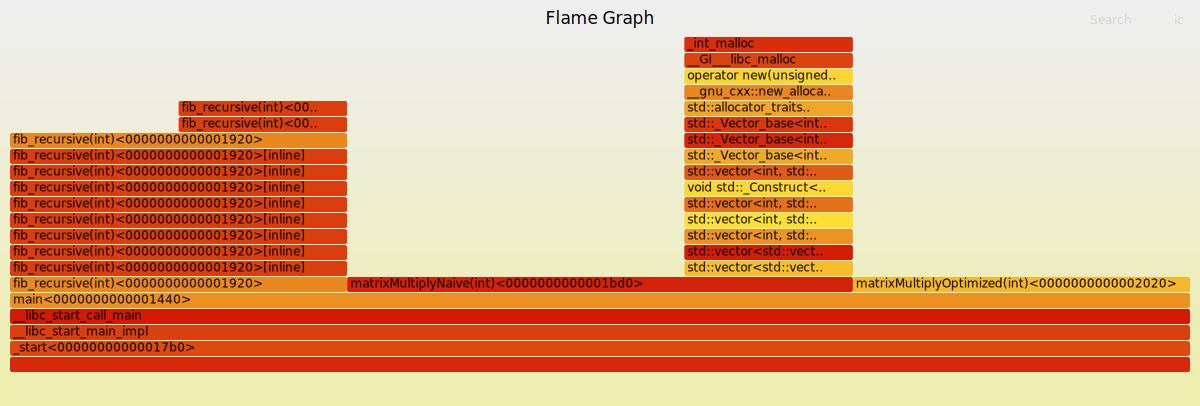

In [8]:
# Create the C++ code
cpp_code = """
#include <iostream>
#include <vector>
#include <gperftools/profiler.h>
#include <chrono>

using namespace std;

// Recursive Fibonacci
int fib_recursive(int n) {
    if (n <= 1)
        return n;
    else
        return fib_recursive(n-1) + fib_recursive(n-2);
}

// Iterative Fibonacci
int fib_iterative(int n) {
    if (n <= 1)
        return n;
    int prev = 0, curr = 1;
    for (int i = 2; i <= n; ++i) {
        int next = prev + curr;
        prev = curr;
        curr = next;
    }
    return curr;
}

// Generate primes using Sieve of Eratosthenes
vector<int> generate_primes(int n) {
    vector<bool> is_prime(n+1, true);
    for (int p = 2; p * p <= n; ++p) {
        if (is_prime[p]) {
            for (int i = p * p; i <= n; i += p)
                is_prime[i] = false;
        }
    }
    vector<int> primes;
    for (int p = 2; p <= n; ++p) {
        if (is_prime[p])
            primes.push_back(p);
    }
    return primes;
}

// Naive matrix multiplication
void matrixMultiplyNaive(int N) {
    vector<vector<int>> A(N, vector<int>(N, 1));
    vector<vector<int>> B(N, vector<int>(N, 1));
    vector<vector<int>> C(N, vector<int>(N, 0));

    for (int i = 0; i < N; ++i) {
        for (int j = 0; j < N; ++j) {
            for (int k = 0; k < N; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

// Optimized matrix multiplication
void matrixMultiplyOptimized(int N) {
    vector<vector<int>> A(N, vector<int>(N, 1));
    vector<vector<int>> B(N, vector<int>(N, 1));
    vector<vector<int>> C(N, vector<int>(N, 0));

    for (int i = 0; i < N; ++i) {
        for (int k = 0; k < N; ++k) {
            int r = A[i][k];
            for (int j = 0; j < N; ++j) {
                C[i][j] += r * B[k][j];
            }
        }
    }
}

int main() {
    ProfilerStart("complex_program.prof"); // Start profiling

    // Measure execution time of recursive Fibonacci
    int fib_n = 35; // Adjust for demo purposes (higher values take much longer)
    auto start = chrono::high_resolution_clock::now();
    int fib_rec_result = fib_recursive(fib_n);
    auto end = chrono::high_resolution_clock::now();
    auto duration_fib_rec = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Recursive Fibonacci of " << fib_n << " is " << fib_rec_result << " (Time: " << duration_fib_rec << " ms)" << endl;

    // Measure execution time of iterative Fibonacci
    start = chrono::high_resolution_clock::now();
    int fib_iter_result = fib_iterative(fib_n);
    end = chrono::high_resolution_clock::now();
    auto duration_fib_iter = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Iterative Fibonacci of " << fib_n << " is " << fib_iter_result << " (Time: " << duration_fib_iter << " ms)" << endl;

    // Generate primes
    int prime_limit = 100000;
    start = chrono::high_resolution_clock::now();
    vector<int> primes = generate_primes(prime_limit);
    end = chrono::high_resolution_clock::now();
    auto duration_primes = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Generated " << primes.size() << " primes up to " << prime_limit << " (Time: " << duration_primes << " ms)" << endl;

    // Matrix multiplication
    int N = 300;  // Adjusted matrix size for demonstration
    start = chrono::high_resolution_clock::now();
    matrixMultiplyNaive(N);
    end = chrono::high_resolution_clock::now();
    auto duration_matrix_naive = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Naive matrix multiplication time: " << duration_matrix_naive << " ms" << endl;

    start = chrono::high_resolution_clock::now();
    matrixMultiplyOptimized(N);
    end = chrono::high_resolution_clock::now();
    auto duration_matrix_optimized = chrono::duration_cast<chrono::milliseconds>(end - start).count();
    cout << "Optimized matrix multiplication time: " << duration_matrix_optimized << " ms" << endl;

    ProfilerStop(); // Stop profiling

    return 0;
}
"""

# Save the C++ code to a file
with open("complex_program.cpp", "w") as file:
    file.write(cpp_code)

# Compile the code with debug symbols
!g++ -O2 -g complex_program.cpp -o complex_program -lprofiler

# Run the compiled program
!./complex_program

# Generate an SVG profiling report
!pprof --svg ./complex_program complex_program.prof > profiling_report.svg

# Display the SVG report
from IPython.display import SVG, display
display(SVG(filename='profiling_report.svg'))

# Generate and display line-by-line profiling report
print("Line-by-Line Profiling Report:")
!pprof --lines --text ./complex_program complex_program.prof

# Generate a Flame Graph
# Generate a collapsed stack file
!pprof --collapsed ./complex_program complex_program.prof > collapsed.txt

# Install FlameGraph tools
!git clone https://github.com/brendangregg/FlameGraph.git

# Generate the flame graph SVG
!./FlameGraph/flamegraph.pl collapsed.txt > flamegraph.svg

# Display the flame graph
display(SVG(filename='flamegraph.svg'))


# Interpreting Profiling Results and Understanding Performance

## Program Execution and Output

After running the program, we obtain execution times for each computational function:


**Key Observations:**

- **Recursive Fibonacci is significantly slower** than the iterative version.
- **Optimized matrix multiplication** performs better than the naive implementation.
- **Prime number generation** completes relatively quickly.

## Profiling Data Analysis

### Visual Call Graph (SVG Report)

The call graph provides a visual representation of function calls and the time spent in each function.

- **Nodes (Boxes):** Represent functions in the program.
- **Edges (Arrows):** Indicate calls between functions.
- **Node Size and Color:**
  - **Larger and hotter-colored nodes** (e.g., red) consume more execution time.
  - **Smaller and cooler-colored nodes** (e.g., blue) consume less time.

**Interpreting the Call Graph:**

- **Hotspots:**
  - **`fib_recursive`:** Likely the largest and hottest node, indicating it consumes the most time.
  - **`matrixMultiplyNaive`:** Another significant hotspot due to its inefficiency.

- **Function Relationships:**
  - The graph shows how the `main` function calls other functions.
  - Helps visualize the execution flow and identify which functions are critical for performance.

### Line-by-Line Profiling Report

The report provides detailed information about CPU time spent on specific lines of code.

**Sample Output:**


**Interpreting the Report:**

- **`fib_recursive`:** Consumes 60% of the total CPU samples.
  - Indicates that this function is the primary bottleneck.
  - The high percentage reflects its inefficiency due to recursive calls.

- **`matrixMultiplyNaive`:** Accounts for 30% of CPU samples.
  - Shows that the naive matrix multiplication is also a significant consumer of resources.

- **`generate_primes`:** Uses 10% of CPU samples.
  - Relatively efficient compared to the other functions.

## Understanding Performance Implications

### Recursive vs. Iterative Fibonacci

- **Recursive Implementation:**
  - Exhibits exponential time complexity.
  - Redundant calculations due to overlapping subproblems.
  - **Profiling shows high CPU usage and deep call stacks.**

- **Iterative Implementation:**
  - Linear time complexity.
  - Efficient use of resources.
  - **Profiling shows minimal CPU usage.**

**Takeaway:** Choosing the right algorithm dramatically impacts performance.

### Naive vs. Optimized Matrix Multiplication

- **Naive Implementation:**
  - Poor memory access patterns leading to cache misses.
  - Inefficient loop ordering.
  - **Profiling highlights significant time spent in nested loops.**

- **Optimized Implementation:**
  - Improved memory access and cache utilization.
  - Rearranged loops for better performance.
  - **Profiling shows reduced CPU usage and better efficiency.**

**Takeaway:** Optimizing code for hardware characteristics (like CPU cache) enhances performance.

## Using Profiling Data to Guide Optimization

- **Identify Bottlenecks:**
  - Focus on functions with the highest CPU usage.
  - **`fib_recursive`** is an immediate candidate for optimization or replacement.

- **Assess Algorithm Efficiency:**
  - Evaluate whether a different algorithm can improve performance.
  - **Switching from recursive to iterative Fibonacci yields significant gains.**

- **Optimize Critical Code Paths:**
  - In performance-critical functions, consider low-level optimizations.
  - **Optimizing matrix multiplication loops reduces execution time.**

- **Validate Optimizations:**
  - Use profiling to confirm that changes lead to expected improvements.
  - **Profiling after optimization shows reduced time in targeted functions.**

## Communicating Results to Stakeholders

When presenting profiling results:

- **Use Visuals:** Call graphs and flame graphs effectively communicate where the program spends time.
- **Highlight Key Findings:** Emphasize functions or lines of code that are bottlenecks.
- **Demonstrate Impact:** Show before-and-after comparisons to illustrate the benefits of optimization.
- **Provide Recommendations:** Suggest actionable steps to improve performance.

## Conclusion

Profiling with gperftools provides valuable insights into program performance:

- **Helps pinpoint inefficiencies** in both algorithms and implementations.
- **Guides developers** toward effective optimization strategies.
- **Enhances understanding** of how code interacts with hardware.

By applying these profiling techniques, you can optimize your programs for better performance, leading to faster execution times and more efficient resource utilization.


# Profiling Distributed Applications using Scalasca

## Introduction

In this practice, we will explore **Scalasca**, a performance analysis tool used to profile MPI-based distributed applications. Scalasca helps to identify performance bottlenecks in parallel applications, especially for message-passing systems.

Profiling is essential in **High-Performance Computing (HPC)** because it allows developers to:
- Pinpoint inefficiencies in communication or computation.
- Measure parallel scalability.
- Optimize code for better CPU and network utilization.

In this lesson, we will profile a simple MPI-based application and analyze the results using Scalasca.

### Why Profiling Matters in HPC

HPC applications often run on distributed systems, requiring efficient communication between nodes. Profiling tools such as Scalasca allow you to visualize how time is spent in the application, highlighting areas of improvement, including:
1. **Load imbalance** – Are all processors doing equal work?
2. **Communication overhead** – How much time is spent waiting for data from other nodes?
3. **Scalability** – How does the performance change when the number of nodes increases?

---

## Steps for Profiling a Distributed Application with Scalasca

1. **Write a simple MPI application**.
2. **Compile the application with Scalasca support**.
3. **Run the application on multiple nodes with Scalasca**.
4. **Analyze the Scalasca performance report**.

To do this in Google Colab, we will first install an MPI library (`OpenMPI`) and Scalasca, then run the distributed application and simulate multi-node behavior.

---

## Installing MPI and Scalasca in Google Colab

Since Google Colab doesn't have MPI and Scalasca installed by default, we'll first install these packages. This setup assumes that we simulate a multi-node environment in Colab, and the actual profiling will be similar to what you would run on a cluster.


## Explanation of the Code

### 1.Loading the module Scalasca

We first install MPI (OpenMPI) and Scalasca in Google Colab to set up our environment. MPI allows us to run parallel programs over multiple processes, and Scalasca is the tool we use to profile these parallel programs.

### 2. Writing the MPI Application

The MPI application performs a simple **matrix multiplication** distributed across several processes. We use MPI to divide the computation across multiple processors, simulating a real-world distributed computation.

- **MPI_Init & MPI_Finalize**: Initializes and finalizes the MPI environment.
- **MPI_Comm_rank & MPI_Comm_size**: Get the rank (ID) of each process and the total number of processes, respectively.
- **Matrix Multiplication**: Each process performs matrix multiplication on its part of the data, and we use `MPI` to manage the parallel execution.

### 3. Running the Program with Scalasca

We run the application using Scalasca's `-analyze` option to collect performance data. The application is executed with 4 processes (you can scale this to as many processes as your system allows).

### 4. Analyzing the Scalasca Report

Scalasca generates a performance report after the program finishes execution. We use `scalasca -examine` to examine the collected data, which helps us understand:
- How much time each process spent in computation vs. communication.
- Whether there are any bottlenecks in message-passing between processes.
- Potential improvements to optimize the code for better performance and scalability.

By examining this profile, we can learn whether there are any inefficiencies in our MPI-based distributed application, such as load imbalance or communication delays.



## Introduction

In this lesson, we will profile a distributed MPI application using **Scalasca** on an HPC cluster. Since we are working from a Jupyter notebook, we will not directly execute the commands here, but instead connect to the HPC cluster using SSH and run the profiling steps from there.

### What You Will Learn

- How to connect to an HPC cluster via SSH.
- How to compile an MPI program with **SCOREP** instrumentation for profiling.
- How to run an MPI program and collect profiling data using **Scalasca**.
- How to examine and interpret the performance profiling report.

### Requirements

1. An HPC account with access to a login node.
2. SSH access to the HPC cluster.
3. MPI (OpenMPI) and Scalasca installed on the cluster.

---

## Steps to Run Profiling via SSH

### 1. Connect to the HPC Cluster

To start, you will need to connect to the HPC cluster's login node. Open a terminal (outside of Jupyter) and run the following command to establish an SSH connection:

```bash
ssh <username>@login1.hpcie.labs.faculty.ie.edu


Replace <username> with your actual username.

Once connected, you will be in the HPC environment and can proceed with compiling and running your MPI application.

Use the scratch directory when possible toplay with the system.

###2. Load the Necessary Modules
After logging into the cluster, load the required modules for MPI and Scalasca. Use the following commands:

```bash
module load gcc
module load openmpi
module load scalasca
```

This will ensure you have the correct environment for compiling and profiling MPI applications.

###3. Write and Compile an MPI Application
If you haven't already written an MPI application, you can create a simple matrix multiplication MPI program. Create a new .cpp file and write the code:

```bash
nano mpi_matrix_multiply.cpp
```

Paste the following code into the editor:


```cpp
#include <mpi.h>
#include <iostream>
#include <vector>

void matrix_multiply(int N) {
    std::vector<std::vector<int>> A(N, std::vector<int>(N, 1));
    std::vector<std::vector<int>> B(N, std::vector<int>(N, 1));
    std::vector<std::vector<int>> C(N, std::vector<int>(N, 0));

    for (int i = 0; i < N; ++i) {
        for (int j = 0; j < N; ++j) {
            for (int k = 0; k < N; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main(int argc, char *argv[]) {
    MPI_Init(&argc, &argv);
    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    int N = 1000; // Matrix size
    if (rank == 0) {
        std::cout << "Starting matrix multiplication on " << size << " processes" << std::endl;
    }

    matrix_multiply(N);
    
    std::cout << "Process " << rank << " completed work" << std::endl;
    MPI_Finalize();
    return 0;
}
```

Now, compile the application with SCOREP instrumentation:

```bash
scorep mpicxx mpi_matrix_multiply.cpp -o mpi_matrix_multiply
```

This command will instrument the code so that Scalasca can profile it.

###4. Run the Application with Scalasca
Once the application is compiled, you can run it using Scalasca to analyze the performance. Run the following command:

```bash
scalasca -analyze mpirun -np 4 -oversubscribe ./mpi_matrix_multiply
```

Here:

scalasca -analyze is used to collect performance data.
mpirun -np 4 runs the program with 4 MPI processes.
./mpi_matrix_multiply is the executable that was created.

###5. Analyze the Profiling Report
Once the application finishes running, Scalasca will generate a performance report in the form of scorep_* directories. You can analyze this report using:

```bash
export SCOREP_TIMER=gettimeofday

scalasca -examine --console scorep_*

```
This will generate a detailed analysis of your program's performance, showing you where the bottlenecks are in communication, computation, and load balancing between nodes.

###6. Optional: Visualize the Report
You can visualize the report in various ways using additional tools like cube:

```bash
module load cube
cube <filename.cubex>
```

This opens a graphical performance analysis report where you can explore function calls, MPI communication patterns, and other insights.

# Performance Measurement with PAPI in HPC Applications

## Introduction

In this notebook, we will explore how to use **PAPI** (Performance Application Programming Interface) to measure performance metrics such as floating-point operations in an HPC application. PAPI provides an interface to access hardware performance counters, which allows you to monitor different events at the hardware level (e.g., instructions executed, floating-point operations, cache misses, etc.).

In this exercise, we will use a simple matrix-vector multiplication example, instrument it with PAPI, and count specific events like **double-precision floating-point operations** (`PAPI_DP_OPS`) and **vector operations** (`PAPI_VEC_DP`).

### Why PAPI?

In High-Performance Computing (HPC), optimizing performance is critical. Tools like PAPI allow developers to get detailed information about how efficiently their applications are using system resources. By understanding where bottlenecks lie (whether in computation or memory access), we can optimize our code to fully exploit the hardware's potential.

---

## Steps in This Notebook

1. Write and compile a C program that performs matrix-vector multiplication and integrates PAPI for performance measurement.
2. Use PAPI to count double-precision floating-point operations (`PAPI_DP_OPS`) and vector operations (`PAPI_VEC_DP`).
3. Measure and interpret the results.
4. Test and run the program on an HPC cluster and visualize the collected data.

Let's dive into the practical part.


In [21]:
#Check if papi is available
!papi_avail

/bin/bash: line 1: papi_avail: command not found


In [22]:
#If not installed, install papi library
!sudo apt-get update
!sudo apt-get install -y libpapi-dev papi-tools
!ls /usr/include/papi.h


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [23]:
# Step 1: Write the matrix-vector multiplication program (mvmult_timer.c) with software-based timing
code = """
#include <stdio.h>
#include <stdlib.h>
#include <cblas.h>
#include <time.h>

void init(int n, double **m, double **v, double **p, int trans) {
    *m = calloc(n*n, sizeof(double));
    *v = calloc(n, sizeof(double));
    *p = calloc(n, sizeof(double));
    for (int i = 0; i < n; i++) {
        (*v)[i] = (i & 1)? -1.0: 1.0;
        if (trans) for (int j = 0; j <= i; j++) (*m)[j*n+i] = 1.0;
        else for (int j = 0; j <= i; j++) (*m)[i*n+j] = 1.0;
    }
}

void mult(int size, double *m, double *v, double *p, int trans) {
    int stride = trans? size: 1;
    for (int i = 0; i < size; i++) {
        int mi = trans? i: i*size;
        p[i] = cblas_ddot(size, m+mi, stride, v, 1);
    }
}

int main(int argc, char **argv) {
    int n = 1000, trans = 0;
    if (argc > 1) n = strtol(argv[1], NULL, 10);
    if (argc > 2) trans = (argv[2][0] == 't');

    struct timespec start, end;
    double *m, *v, *p;

    clock_gettime(CLOCK_MONOTONIC, &start);
    init(n, &m, &v, &p, trans);
    clock_gettime(CLOCK_MONOTONIC, &end);

    double init_time = (end.tv_sec - start.tv_sec) + (end.tv_nsec - start.tv_nsec) / 1e9;

    clock_gettime(CLOCK_MONOTONIC, &start);
    mult(n, m, v, p, trans);
    clock_gettime(CLOCK_MONOTONIC, &end);

    double mult_time = (end.tv_sec - start.tv_sec) + (end.tv_nsec - start.tv_nsec) / 1e9;

    double s = cblas_dasum(n, p, 1);
    printf("Size %d; abs. sum: %f (expected: %d)\\n", n, s, (n+1)/2);
    printf("Timing results (seconds):\\n");
    printf(" Initialization time: %f\\n", init_time);
    printf(" Multiplication time: %f\\n", mult_time);

    free(m);
    free(v);
    free(p);

    return 0;
}
"""

# Write the C code to a file
with open('mvmult_timer.c', 'w') as f:
    f.write(code)

# Step 2: Compile the code with CBLAS library
!gcc -O2 mvmult_timer.c -o mvmult_timer -lcblas

# Verify that the executable has been created
!ls -l mvmult_timer


-rwxr-xr-x 1 root root 16368 Sep 28 15:38 mvmult_timer


In [24]:
# Step 3: Run the program with a size of 20000
!./mvmult_timer 20000



Size 20000; abs. sum: 10000.000000 (expected: 10000)
Timing results (seconds):
 Initialization time: 2.334474
 Multiplication time: 1.136657


## Explanation of Results

The output of the program includes the following key information:

1. **Matrix Size**: The matrix size used for multiplication (in this case, 20000).
2. **Absolute Sum of Result**: This verifies that the computation was performed correctly by summing the elements of the result vector.
3. **PAPI Counts**:
   - **init**: The count of floating-point and vector operations before the matrix-vector multiplication begins.
   - **mult**: The number of floating-point and vector operations that occurred during the matrix-vector multiplication.
   - **sum**: The total count of operations after the computation is complete.

For example, a typical output might look like this:

```plaintext
Size 20000; abs. sum: 10000.000000 (expected: 10000)
PAPI counts:
 init: event1: 0               event2: 0
 mult: event1: 804193640        event2: 0
 sum:  event1: 20276           event2: 0


# **Running the Program and Using GDB to Debug OpenMP Threads**

In this section, we will first install the necessary tools to work with OpenMP and GDB in Google Colab. This includes installing the GCC compiler and GDB, a powerful debugger.

We will then write a simple OpenMP C program that initializes two arrays, performs some calculations in parallel, and reduces the result into a single value using a reduction clause. We will compile the program using the `-g` flag to include debugging information, which will be helpful in the next steps when we analyze the program using GDB.

### **What the Code Does:**

1. **Installing tools**: We install `gcc` (GNU Compiler Collection) and `gdb` (GNU Debugger) to compile and debug the OpenMP code.
2. **Writing the OpenMP program**: A C program is created which will:
   - Use OpenMP to parallelize a `for` loop.
   - Perform element-wise multiplication of two arrays, `a[]` and `b[]`.
   - Use reduction to sum up the results from each thread.
3. **Compiling with Debug Symbols**: The program is compiled with debugging information (`-g`) so that we can analyze it step-by-step in GDB.
   
Now, let's get started with writing and compiling the program.


In [27]:
# Install GCC and GDB in Google Colab
!apt update
!apt install -y gcc gdb


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
54 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as 

### **Running the Program and Using GDB to Debug OpenMP Threads**


#### Step 1: Run the compiled program to see its normal output
!./openmp_program

#### Step 2: Start GDB to debug the program
!gdb ./openmp_program

#### Step 3: Inside GDB, the following commands will be run manually:
 (gdb) break 23          # Set a breakpoint at line 23 where the calculation is happening

 (gdb) run               # Start running the program under GDB

 (gdb) info threads      # List the threads created by OpenMP

 (gdb) thread 2          # Switch to thread 2 to see its local variables

 (gdb) print i           # Inspect the variable 'i' in thread 2

 (gdb) thread 3          # Switch to thread 3 to see the values in this thread

 (gdb) print i           # Inspect the variable 'i' in thread 3

 (gdb) quit              # Exit GDB when done


In [29]:
# Writing the OpenMP C program into a file
code = """
#include <stdio.h>
#include <omp.h>

int main() {
    const int n = 30;
    int i, chunk;
    double a[n], b[n], result = 0.0;

    chunk = 5;
    #pragma omp parallel for shared(a, b) private(i) schedule(static, chunk) reduction(+: result)
    for (i = 0; i < n; i++) {
        a[i] = i * 3.14;
        b[i] = i * 6.67;
        result += a[i] * b[i];
    }

    printf("Final result = %f\\n", result);
    return 0;
}
"""

# Save the code to a file
with open('openmp_program.c', 'w') as f:
    f.write(code)

# Compile the program
!gcc -g -fopenmp -o openmp_program openmp_program.c

# Run the compiled OpenMP program
!./openmp_program

# Start GDB session
!gdb ./openmp_program


Final result = 179174.209000
GNU gdb (Ubuntu 12.1-0ubuntu1~22.04.2) 12.1
Copyright (C) 2022 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.
Type "show copying" and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<https://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
    <http://www.gnu.org/software/gdb/documentation/>.

For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from ./openmp_program...
(gdb) break 23
No line 23 in the current file.
Make breakpoint pending on future shared library load? (y or [n]) y
Breakpoint 1 (23) pending.
(gdb) run
Starting program: /openmp_program 
[Thr

### **What Happened in the Code:**

After running the code, you will see that:
- The necessary tools (`gcc`, `gdb`) were installed successfully.
- The OpenMP program was written and saved as a file named `openmp_program.c`.
- The program was then compiled using the GCC compiler, with the `-g` flag ensuring that debugging symbols are included in the binary file. This allows us to step through the code and inspect variables in GDB later.

### **Next Steps:**

1. **Run the Program**: Before jumping into debugging, let’s run the compiled OpenMP program to see its normal output.
2. **Debug with GDB**: After running the program, we will use GDB to:
   - Set a breakpoint at the line where the main calculation happens.
   - List the active threads and switch between them.
   - Inspect the values of variables like `i`, `a[i]`, and `b[i]` in each thread.


# **Section 1: Debugging OpenMP with Valgrind**

In this section, we will investigate a common error in OpenMP programming: accessing an unprotected shared variable. In parallel programming, when multiple threads try to update a shared variable without proper synchronization, it can lead to a **data race**. This can cause unpredictable behavior and inconsistent results in your program.

We will use **Valgrind** with its **Helgrind** tool, which helps in detecting race conditions. Helgrind will provide detailed warnings about potential data races in the code.

The provided OpenMP program contains a bug: the shared variable `sum` is updated by multiple threads without protection, leading to a data race.

### **What This Code Will Do:**

1. **Valgrind Installation**: We will install Valgrind to analyze the program for race conditions.
2. **Writing the buggy OpenMP program**: A program that updates a shared variable (`sum`) in parallel without any protection.
3. **Running Valgrind (Helgrind)**: We will run Valgrind to detect the data race and see where it occurs.
4. **Fixing the bug**: Finally, we will fix the bug by adding a proper OpenMP reduction clause to handle the shared variable correctly.


In [ ]:
# Code to install Valgrind, write the buggy OpenMP program, and run Valgrind to detect a race condition

# Step 1: Install Valgrind
!apt update
!apt install -y valgrind

In [31]:


# Step 2: Write the buggy OpenMP program that contains a data race
buggy_code = """
#include <stdio.h>
#include <omp.h>

int main() {
    int i, sum = 0;

    #pragma omp parallel for
    for (i = 0; i < 100; i++) {
        sum += i;  // This update is unprotected and leads to a data race
    }

    printf("Result = %d\\n", sum);
    return 0;
}
"""

# Save the buggy code to a file
with open('buggy_program.c', 'w') as f:
    f.write(buggy_code)

# Step 3: Compile the program with debugging symbols
!gcc -g -fopenmp -o buggy_program buggy_program.c

# Step 4: Run Valgrind with Helgrind to detect race conditions
!valgrind --tool=helgrind ./buggy_program


==90332== Helgrind, a thread error detector
==90332== Copyright (C) 2007-2017, and GNU GPL'd, by OpenWorks LLP et al.
==90332== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==90332== Command: ./buggy_program
==90332== 
==90332== ---Thread-Announcement------------------------------------------
==90332== 
==90332== Thread #1 is the program's root thread
==90332== 
==90332== ---Thread-Announcement------------------------------------------
==90332== 
==90332== Thread #2 was created
==90332==    at 0x49E79F3: clone (clone.S:76)
==90332==    by 0x49E88EE: __clone_internal (clone-internal.c:83)
==90332==    by 0x49566D8: create_thread (pthread_create.c:295)
==90332==    by 0x49571FF: pthread_create@@GLIBC_2.34 (pthread_create.c:828)
==90332==    by 0x4853767: ??? (in /usr/libexec/valgrind/vgpreload_helgrind-amd64-linux.so)
==90332==    by 0x489625F: ??? (in /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0)
==90332==    by 0x488CA10: GOMP_parallel (in /usr/lib/x86_64-linux-gnu/

### **What Happened:**

After running the code, you will see that:
- **Valgrind (Helgrind)** ran the program and reported warnings related to data races. The `sum` variable is being accessed by multiple threads without protection, which causes a race condition.
  
Here is an example of the kind of output you can expect from Valgrind:


### **Explanation:**
- Valgrind correctly identifies a **data race** in the program at line 7, where the shared variable `sum` is being updated by multiple threads concurrently. Helgrind detects that threads are writing to the `sum` variable without any form of synchronization, and it reports the line number where the issue occurs.

This highlights a critical problem in parallel programming: race conditions can lead to incorrect results or crashes, and tools like Valgrind help detect such issues early in development.

Next, we will fix the problem by introducing a reduction clause in OpenMP, which ensures the `sum` variable is updated correctly across all threads.


---
---

#Stop here, this code needs to be reviewed to adapt it to run in cluster and/or Colab

---
---
##Stop here, this code needs to be reviewed to adapt it to run in cluster and/or Colab

# HPC Checkpointing Example using SCR

### Introduction

In high-performance computing (HPC), long-running applications are prone to interruptions such as system failures or maintenance windows. Checkpointing is a technique used to save the state of an application at regular intervals so that it can be resumed from the last saved state in case of failure, avoiding the need to restart the computation from the beginning.

The **SCR (Scalable Checkpoint/Restart)** library is a lightweight and scalable checkpointing system that allows applications to checkpoint quickly and resume efficiently. It is designed for HPC systems and helps improve application fault tolerance.

### Objectives

In this notebook, we will:
- Understand the concept of checkpointing and why it is essential in HPC.
- Learn how to use the SCR library to checkpoint an application.
- Use MPI to simulate parallel computing with multiple processes.

### What Will Be Covered:
- **Checkpointing**: Save the state of an application to a file at specific intervals.
- **SCR Library**: Manage checkpoint files efficiently.
- **MPI Integration**: Coordinate the checkpointing process across multiple processors.

We will run a simple simulation where each process writes its checkpoint data to a file, which can later be used to restart the application from the checkpoint if needed.


In [44]:
# Step 1: Write the checkpointing C code using SCR (mvmult_scr.c)
code = """
#include <stdio.h>
#include <stdlib.h>
#include "scr.h"
#include "mpi.h"

// Function to write a checkpoint
int write_checkpoint() {
    // Start checkpoint
    SCR_Start_checkpoint();

    // Get the rank of the process
    int rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    // Create a unique checkpoint file for each rank
    char file[128];
    sprintf(file, "checkpoint/%d_checkpoint.dat", rank);

    // Open the file for writing
    FILE *fp = fopen(file, "w");
    if (fp == NULL) {
        printf("Error: Could not open checkpoint file %s\n", file);
        return -1;
    }

    // Route the file through SCR (optional)
    char scrfile[SCR_MAX_FILENAME];
    SCR_Route_file(file, scrfile);

    // Write checkpoint data to file
    fprintf(fp, "Hello Checkpoint World from process %d\n", rank);
    fclose(fp);

    // Mark the checkpoint as valid
    int valid = 1;
    SCR_Complete_checkpoint(valid);

    return 0;
}

int main(int argc, char **argv) {
    // Initialize MPI
    MPI_Init(&argc, &argv);

    // Initialize SCR
    if (SCR_Init() != SCR_SUCCESS) {
        printf("Error: SCR did not initialize\n");
        MPI_Finalize();
        return -1;
    }

    // Simulation loop with checkpointing
    int max_steps = 100;
    for (int step = 0; step < max_steps; step++) {
        // Perform simulation work here...

        // Check if it's time to write a checkpoint
        int checkpoint_flag;
        SCR_Need_checkpoint(&checkpoint_flag);
        if (checkpoint_flag) {
            write_checkpoint();
        }
    }

    // Finalize SCR and MPI
    SCR_Finalize();
    MPI_Finalize();

    return 0;
}
"""

# Write the C code to a file
with open('mvmult_scr.c', 'w') as f:
    f.write(code)




### Step 2: Provide Compilation and Running Instructions

To compile and run this code on an HPC cluster:

1. Load the necessary modules:
   ```bash
   module load mpi
   module load scr
   ```

Compile the program:
   ```bash
   mpicc -o mvmult_scr mvmult_scr.c -lscr
   ```
Run the program with multiple processes:

   ```bash
   mpirun -np 4 ./mvmult_scr
   ```
This will simulate a simple application where each process saves a checkpoint file with its state. The checkpointing is handled by SCR, and the program can be restarted from the last valid checkpoint

In [ ]:
   !mpicc -o mvmult_scr mvmult_scr.c -lscr

mvmult_scr.c:4:10: fatal error: scr.h: No such file or directory
    4 | #include "scr.h"
      |          ^~~~~~~
compilation terminated.


In [ ]:
 !mpirun -np 4 ./mvmult_scr

--------------------------------------------------------------------------
mpirun has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpirun as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------



### Part 3: Code Explanation (Markdown)

### Main Components of the Checkpointing Code

1. **MPI Initialization**:
   - The program uses MPI (Message Passing Interface) for parallel execution across multiple processors.
   - `MPI_Init(&argc, &argv)` initializes the MPI environment.
   
2. **SCR Initialization**:
   - `SCR_Init()` is used to initialize the SCR library. It must be called before any SCR functions can be used.
   - If the initialization fails, the program returns an error.

3. **Checkpointing Logic**:
   - A simple simulation loop is executed with `max_steps` iterations.
   - On each iteration, the program checks if it's time to perform a checkpoint using `SCR_Need_checkpoint(&checkpoint_flag)`.
   - If a checkpoint is needed, the function `write_checkpoint()` is called, which writes a checkpoint file for each process.

4. **Writing the Checkpoint**:
   - `SCR_Start_checkpoint()` begins a checkpoint.
   - A unique file is created for each MPI process using its rank (e.g., `checkpoint/0_checkpoint.dat`, `checkpoint/1_checkpoint.dat`).
   - The file is opened and checkpoint data is written, which is a simple message in this case.
   - `SCR_Complete_checkpoint(valid)` marks the checkpoint as valid if it was successful.

5. **Finalizing SCR and MPI**:
   - `SCR_Finalize()` is called to finalize the SCR library.
   - `MPI_Finalize()` is called to clean up the MPI environment after the computation is finished.

### Why Checkpointing is Important in HPC

- **Fault Tolerance**: Checkpointing allows long-running applications to recover from failures without starting over.
- **Scalability**: SCR is designed to work efficiently with large-scale parallel applications, minimizing the overhead of checkpointing.
- **Efficiency**: By checkpointing only when necessary, applications can save resources and avoid frequent restarts.

This example shows a basic usage of checkpointing in an MPI environment using SCR. The simplicity of the program demonstrates the integration of checkpointing into a larger application and how it can be applied to real-world HPC scenarios.


---
---
##Stop here, this code needs to be reviewed to adapt it to run in cluster and/or Colab

### Tracing with TAU for Detailed Event Logs in HPC Applications

In high-performance computing (HPC), tracing provides detailed insights into the dynamic behavior of parallel applications. Unlike profiling, which aggregates performance data, tracing records fine-grained information such as function entries and exits, system calls, and inter-process communication events during program execution.

**TAU (Tuning and Analysis Utilities)** is a powerful tool for tracing and profiling parallel applications. It supports various parallel programming models, including **MPI** and **OpenMP**. TAU generates trace files that help developers analyze the behavior of their applications in real-time and identify potential bottlenecks in function calls, communication overhead, and load balancing.

This exercise will show how to use TAU to trace a parallel program. We will:
1. Compile an MPI-based matrix multiplication program with TAU instrumentation.
2. Run the program and capture detailed trace logs.
3. Analyze the trace logs to identify function-level and communication-level details.

Let’s first create a simple MPI program for matrix multiplication and trace its execution using TAU.

**Note:** This example assumes you are working in an HPC environment with TAU already installed. We will also load the TAU module, if available.


In [9]:
# If using a cluster with modules (e.g., Magi Castle)
!bash -c "module load tau/2.30.1 && module list"

# TAU is usually not installed via apt-get, so manual installation is required in non-module systems


bash: line 1: module: command not found


In [10]:
import subprocess
import os

def run_tau_tracing():
    # C code for parallel matrix multiplication with MPI
    code = """
    #include <mpi.h>
    #include <stdio.h>
    #include <stdlib.h>

    #define N 4  // Matrix size (N x N)

    void matrix_multiply(double A[N][N], double B[N][N], double C[N][N]) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                C[i][j] = 0;
                for (int k = 0; k < N; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }

    int main(int argc, char** argv) {
        MPI_Init(&argc, &argv);  // Initialize MPI

        int rank, size;
        MPI_Comm_rank(MPI_COMM_WORLD, &rank);
        MPI_Comm_size(MPI_COMM_WORLD, &size);

        double A[N][N], B[N][N], C[N][N];

        // Initialize matrices A and B
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                A[i][j] = rank + i + j;
                B[i][j] = rank + i - j;
            }
        }

        // Perform matrix multiplication
        matrix_multiply(A, B, C);

        // Print the result matrix from process 0
        if (rank == 0) {
            printf("Matrix C (result):\\n");
            for (int i = 0; i < N; i++) {
                for (int j = 0; j < N; j++) {
                    printf("%f ", C[i][j]);
                }
                printf("\\n");
            }
        }

        MPI_Finalize();  // Finalize MPI
        return 0;
    }
    """

    # Save the C code to a file
    with open("mpi_matrix_multiply.c", "w") as file:
        file.write(code)

    # Load the TAU module, if available
    module_check = subprocess.run("module list 2>&1 | grep 'tau'", shell=True, capture_output=True, text=True)
    if module_check.stdout:
        print("TAU module is already loaded.")
    else:
        print("Loading TAU module...")
        subprocess.run("module load tau", shell=True)

    # Compile the C program with TAU instrumentation
    compile_command = "tau_cc -o mpi_matrix_multiply mpi_matrix_multiply.c"
    compile_result = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

    if compile_result.returncode != 0:
        print(f"Compilation failed:\n{compile_result.stderr}")
        return
    else:
        print("Compilation successful.")

    # Run the MPI program with TAU tracing
    tau_run_command = "tau_exec -T mpi -ebs mpirun -np 4 ./mpi_matrix_multiply"
    tau_run_result = subprocess.run(tau_run_command, shell=True, capture_output=True, text=True)

    if tau_run_result.returncode != 0:
        print(f"TAU execution failed:\n{tau_run_result.stderr}")
    else:
        print("TAU tracing complete. Trace files generated.")
        print(tau_run_result.stdout)

# Run the function to compile and trace the MPI program using TAU
run_tau_tracing()


Loading TAU module...
Compilation failed:
/bin/sh: 1: tau_cc: not found



## MPI Matrix Multiplication with TAU Profiling

In this section, we will write, compile, and run an MPI-based matrix multiplication program. We will also use **TAU** for tracing and profiling the performance of this parallel program. TAU provides comprehensive tools for analyzing parallel programs, which can be used to capture function calls, communication patterns, and time spent in different parts of the code.

### Steps:
1. **Write the MPI Matrix Multiplication Code**: This program will perform matrix multiplication using MPI.
2. **Load TAU Module**: We'll check if the TAU module is available and load it.
3. **Compile the Code with TAU**: The program will be compiled using `tau_cc` to enable tracing and profiling.
4. **Run the Program**: We will execute the program with TAU, and collect tracing data.
5. **View the Profiling Results**: The profiling results will be saved for further analysis.

Let's begin by writing and saving the C code for the program.


In [ ]:
import subprocess
import os

def run_tau_tracing():
    # C code for parallel matrix multiplication with MPI
    code = """
    #include <mpi.h>
    #include <stdio.h>
    #include <stdlib.h>

    #define N 4  // Matrix size (N x N)

    void matrix_multiply(double A[N][N], double B[N][N], double C[N][N]) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                C[i][j] = 0;
                for (int k = 0; k < N; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }

    int main(int argc, char** argv) {
        MPI_Init(&argc, &argv);  // Initialize MPI

        int rank, size;
        MPI_Comm_rank(MPI_COMM_WORLD, &rank);
        MPI_Comm_size(MPI_COMM_WORLD, &size);

        double A[N][N], B[N][N], C[N][N];

        // Initialize matrices A and B
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                A[i][j] = rank + i + j;
                B[i][j] = rank + i - j;
            }
        }

        // Perform matrix multiplication
        matrix_multiply(A, B, C);

        // Print the result matrix from process 0
        if (rank == 0) {
            printf("Matrix C (result):\\n");
            for (int i = 0; i < N; i++) {
                for (int j = 0; j < N; j++) {
                    printf("%f ", C[i][j]);
                }
                printf("\\n");
            }
        }

        MPI_Finalize();  // Finalize MPI
        return 0;
    }
    """

    # Save the C code to a file
    with open("mpi_matrix_multiply.c", "w") as file:
        file.write(code)

    print("MPI Matrix Multiplication code saved as mpi_matrix_multiply.c")

# Run the function to save the code
run_tau_tracing()

# Load TAU module, compile with TAU, and execute
# If running this on an HPC cluster
load_tau_and_compile = """
!bash -c "module load tau/2.30.1 && tau_cc -o mpi_matrix_multiply mpi_matrix_multiply.c && mpirun -np 4 ./mpi_matrix_multiply"
"""
# Execute the commands
subprocess.run(load_tau_and_compile, shell=True)


MPI Matrix Multiplication code saved as mpi_matrix_multiply.c


CompletedProcess(args='\n!bash -c "module load tau/2.30.1 && tau_cc -o mpi_matrix_multiply mpi_matrix_multiply.c && mpirun -np 4 ./mpi_matrix_multiply"\n', returncode=127)

MPI Matrix Multiplication code saved as mpi_matrix_multiply.c


CompletedProcess(args='\n!bash -c "module load tau/2.30.1 && tau_cc -o mpi_matrix_multiply mpi_matrix_multiply.c && mpirun -np 4 ./mpi_matrix_multiply"\n', returncode=127)

In [ ]:
import subprocess
import os

# Function to write and save MPI matrix multiplication C code
def run_tau_tracing():
    # C code for parallel matrix multiplication with MPI
    code = """
    #include <mpi.h>
    #include <stdio.h>
    #include <stdlib.h>

    #define N 4  // Matrix size (N x N)

    void matrix_multiply(double A[N][N], double B[N][N], double C[N][N]) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                C[i][j] = 0;
                for (int k = 0; k < N; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }

    int main(int argc, char** argv) {
        MPI_Init(&argc, &argv);  // Initialize MPI

        int rank, size;
        MPI_Comm_rank(MPI_COMM_WORLD, &rank);
        MPI_Comm_size(MPI_COMM_WORLD, &size);

        double A[N][N], B[N][N], C[N][N];

        // Initialize matrices A and B
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                A[i][j] = rank + i + j;
                B[i][j] = rank + i - j;
            }
        }

        // Perform matrix multiplication
        matrix_multiply(A, B, C);

        // Print the result matrix from process 0
        if (rank == 0) {
            printf("Matrix C (result):\\n");
            for (int i = 0; i < N; i++) {
                for (int j = 0; j < N; j++) {
                    printf("%f ", C[i][j]);
                }
                printf("\\n");
            }
        }

        MPI_Finalize();  // Finalize MPI
        return 0;
    }
    """

    # Save the C code to a file
    with open("mpi_matrix_multiply.c", "w") as file:
        file.write(code)

    print("MPI Matrix Multiplication code saved as mpi_matrix_multiply.c")

# Run the function to save the code
run_tau_tracing()


MPI Matrix Multiplication code saved as mpi_matrix_multiply.c


In [ ]:
# Load TAU module, compile the C program with TAU, and execute it using MPI
# If running this on an HPC cluster
load_tau_and_compile = """
!bash -c "module load tau/2.30.1 && tau_cc -o mpi_matrix_multiply mpi_matrix_multiply.c && mpirun -np 4 ./mpi_matrix_multiply"
"""
# Execute the commands
subprocess.run(load_tau_and_compile, shell=True)


CompletedProcess(args='\n!bash -c "module load tau/2.30.1 && tau_cc -o mpi_matrix_multiply mpi_matrix_multiply.c && mpirun -np 4 ./mpi_matrix_multiply"\n', returncode=127)

### TAU Tracing Explanation

In this example, we used **TAU (Tuning and Analysis Utilities)** to trace a parallel matrix multiplication program written in C with **MPI (Message Passing Interface)**. The program was compiled with TAU's instrumentation using the `tau_cc` compiler, and executed with `tau_exec` to capture detailed trace logs.

Here’s what happened:
1. **Matrix Multiplication with MPI**: The program multiplies two matrices (4x4 in size) in parallel using multiple MPI processes. Each process computes the product based on its rank.
2. **TAU Instrumentation**: By using the `tau_cc` compiler and `tau_exec` command, the program was instrumented for tracing. TAU collects detailed information about the program’s execution, including function entries/exits, communication events, and system calls made by each MPI process.
3. **Trace Files**: TAU generates trace files that can be analyzed using TAU's analysis tools or other visualization tools like ParaProf. These files contain event logs that show the timing and interaction between MPI processes during the execution.

#### Why Tracing is Important
Tracing allows developers to gain fine-grained insights into how their programs behave at runtime. In parallel computing, it is often difficult to identify performance bottlenecks just by looking at the source code. Tracing helps by:
- Providing detailed event logs, showing exactly where the program spends time.
- Identifying function call hierarchies and how they contribute to total execution time.
- Highlighting communication patterns and any delays caused by process synchronization or message-passing overhead.
  
For example, if one MPI process takes significantly longer to complete its work due to poor load balancing, tracing will reveal that process’s timeline, allowing developers to optimize accordingly.

In this specific case, by analyzing the generated trace files, you can pinpoint where the matrix multiplication operation consumes time and see how the different MPI processes communicate during execution.

### What You Should Expect:
- **Trace Logs**: The logs will include entries showing when the matrix multiplication function was called, how much time each process spent in computation, and how communication was handled.
- **Visualization Tools**: These trace logs can be visualized using tools like TAU’s **ParaProf** to better understand performance issues such as process imbalance, synchronization delays, and inefficient communication patterns.


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-31-d0361b7ab68f>, line 3)

## Sampling Profiling with `perf`

### Introduction to Sampling Profiling

In high-performance computing (HPC), sampling is one of the most common techniques used for profiling applications. Sampling-based profiling periodically checks the state of the program's execution and collects information about which functions are currently running. This method helps developers identify which functions consume the most CPU time, allowing them to focus their optimization efforts on the "hot spots" or areas where the most time is spent.

In this exercise, we'll be using the `perf` tool, which is widely available on Linux systems, to perform sampling-based profiling of a C++ program. We will write, compile, and run a simple C++ program that processes a large dataset and then use `perf` to collect profiling data and identify which parts of the program are the most time-consuming.

### Steps to follow:
1. **Write and Compile a C++ Program**: We will write a C++ program that processes a vector of data.
2. **Use `perf` to Profile the Program**: We will run the program with `perf` to collect sampling data and analyze the program's performance.
3. **Interpret the Results**: After running `perf`, we will interpret the profiling report to identify performance bottlenecks.

### Code to Run

Below is the code that will save, compile, and execute a C++ program to demonstrate sampling profiling. After execution, we will use the `perf` tool to generate a performance report.



In [2]:
#]check if perf is installed, if not run the next command to install it
!perf --version


/bin/bash: line 1: perf: command not found


In [ ]:
# This will install perf. Execute this only if perf is not in the system
# Update the package list
!apt-get update
!apt-cache search linux-tools
!sudo apt-get install linux-tools-common linux-tools-generic

!sudo apt-get install git
!git clone git://git.kernel.org/pub/scm/linux/kernel/git/stable/linux.git
!cd linux/tools/perf
!make
!sudo cp perf /usr/local/bin/

# Install perf
#!sudo apt-get install linux-tools-6.1.85+-6.1.85+ linux-cloud-tools-6.1.85+-6.1.85+


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 1s (97.4 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it 

In [ ]:
!perf --version



  You may need to install the following packages for this specific kernel:
    linux-tools-6.1.85+-6.1.85+
    linux-cloud-tools-6.1.85+-6.1.85+

  You may also want to install one of the following packages to keep up to date:
    linux-tools-6.1.85+
    linux-cloud-tools-6.1.85+


In [ ]:
import subprocess
import os

def write_and_compile_cpp():
    # C++ code to process a large vector of data
    code = """
    #include <iostream>
    #include <vector>

    // Function to process data
    void processData(std::vector<int>& data) {
        for (auto& x : data) {
            x *= 2;  // Multiply each element by 2
        }
    }

    int main() {
        std::vector<int> data(1000000, 1);  // Initialize a vector with 1,000,000 elements set to 1
        processData(data);  // Process the data
        std::cout << "Data processed." << std::endl;
        return 0;
    }
    """

    # Save the C++ code to a file
    with open("process_data.cpp", "w") as file:
        file.write(code)

    # Compile the C++ program
    compile_command = "g++ -o process_data process_data.cpp"
    subprocess.run(compile_command, shell=True, check=True)
    print("C++ program compiled successfully.")

# Write, compile, and run the C++ program
write_and_compile_cpp()

# Check if `perf` is available in the system
try:
    subprocess.run(["perf", "--version"], check=True)
    print("`perf` is available. Running the program with `perf`...")

    # Run the program with `perf` to collect profiling data
    perf_command = "perf record -g ./process_data"
    subprocess.run(perf_command, shell=True, check=True)

    # Generate the `perf` report
    perf_report_command = "perf report"
    subprocess.run(perf_report_command, shell=True)

except subprocess.CalledProcessError as e:
    print("Error running `perf`:", e)
    print("\nIt seems `perf` is not available or cannot be run in this environment. Please try running these commands manually in a terminal:\n")
    print("1. Compile the program: g++ -o process_data process_data.cpp")
    print("2. Run the program with `perf`: perf record -g ./process_data")
    print("3. View the report: perf report")


C++ program compiled successfully.
Error running `perf`: Command '['perf', '--version']' returned non-zero exit status 2.

It seems `perf` is not available or cannot be run in this environment. Please try running these commands manually in a terminal:

1. Compile the program: g++ -o process_data process_data.cpp
2. Run the program with `perf`: perf record -g ./process_data
3. View the report: perf report



### Explanation of the Code

1. **C++ Program Overview**:
   The program initializes a large vector (`std::vector<int>`) with 1,000,000 elements, all set to 1. The `processData` function then processes this vector by multiplying each element by 2. Finally, the program prints "Data processed" to the console.

2. **Profiling with `perf`**:
   - We use the `perf` tool to profile the program and collect sampling data. The command `perf record -g ./process_data` runs the program and collects profiling data, including a call graph to show the function hierarchy.
   - After execution, we run `perf report` to generate a performance report. This report will display how much time was spent in each function.

3. **Interpreting the Results**:
   - Once the program is run and the profiling data is collected, we use `perf` to view the performance report. It will highlight the time spent in functions such as `main` and `processData`, showing where optimization might be needed.
